<a href="https://colab.research.google.com/github/russellheines/ml-experiments/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

original_val_loss_values = history.history['val_loss']

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5402 - acc: 0.7729 - val_loss: 0.4218 - val_acc: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3439 - acc: 0.8907 - val_loss: 0.3275 - val_acc: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2583 - acc: 0.9162 - val_loss: 0.2928 - val_acc: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2107 - acc: 0.9303 - val_loss: 0.2783 - val_acc: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1756 - acc: 0.9425 - val_loss: 0.2936 - val_acc: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1505 - acc: 0.9520 - val_loss: 0.3177 - val_acc: 0.8729
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1291 - acc: 0.9592 - val_loss: 0.2941 - val_acc: 0.8815
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1103 - a

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

smaller_val_loss_values = history.history['val_loss']

Epoch 1/20
30/30 [==============================] - 2s 64ms/step - loss: 0.6092 - acc: 0.7024 - val_loss: 0.5276 - val_acc: 0.8512
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4555 - acc: 0.8681 - val_loss: 0.4226 - val_acc: 0.8730
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3567 - acc: 0.9016 - val_loss: 0.3583 - val_acc: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2890 - acc: 0.9193 - val_loss: 0.3206 - val_acc: 0.8837
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2435 - acc: 0.9291 - val_loss: 0.2993 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2089 - acc: 0.9392 - val_loss: 0.2848 - val_acc: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1834 - acc: 0.9461 - val_loss: 0.2763 - val_acc: 0.8894
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1621 - a

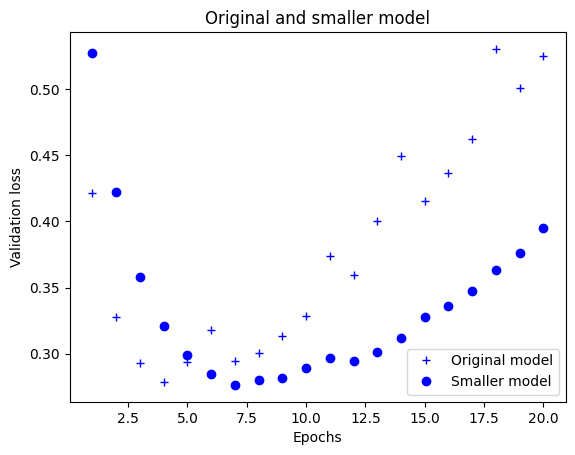

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), original_val_loss_values, 'b+', label='Original model')
plt.plot(range(1, 21), smaller_val_loss_values, 'bo', label='Smaller model')
plt.title('Original and smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()